In [1]:
import cv2
import numpy as np
img = cv2.imread('car.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# This returns an array of r and theta values
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    # Stores the value of cos(theta) in a
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*r
    y0 = b*r
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
cv2.imwrite('linesDetected.jpg', img)


True

In [2]:
import cv2 
import numpy as np 

# Read image. 
img = cv2.imread('car2.jpg', cv2.IMREAD_COLOR) 

# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

# Blur using 3 * 3 kernel. 
gray_blurred = cv2.blur(gray, (3, 3)) 

# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(gray_blurred, 
				cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, 
			param2 = 30, minRadius = 1, maxRadius = 40) 

# Draw circles that are detected. 
if detected_circles is not None: 

	# Convert the circle parameters a, b and r to integers. 
	detected_circles = np.uint16(np.around(detected_circles)) 

	for pt in detected_circles[0, :]: 
		a, b, r = pt[0], pt[1], pt[2] 

		# Draw the circumference of the circle. 
		cv2.circle(img, (a, b), r, (0, 255, 0), 2) 

		# Draw a small circle (of radius 1) to show the center. 
		cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
		cv2.imshow("Detected Circle", img) 
		cv2.waitKey(0) 


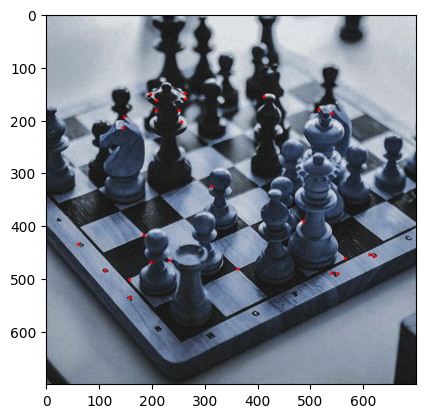

(<matplotlib.image.AxesImage at 0x2a02b37f290>, None)

In [3]:
# import the required library 
import numpy as np 
import cv2 
from matplotlib import pyplot as plt 

img = cv2.imread('chess.jpg') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
corners = cv2.goodFeaturesToTrack(gray, 27, 0.01, 10) 
corners = corners.astype(np.int64)  # or np.int_
for i in corners: 
	x, y = i.ravel() 
	cv2.circle(img, (x, y), 3, 255, -1) 

plt.imshow(img), plt.show() 


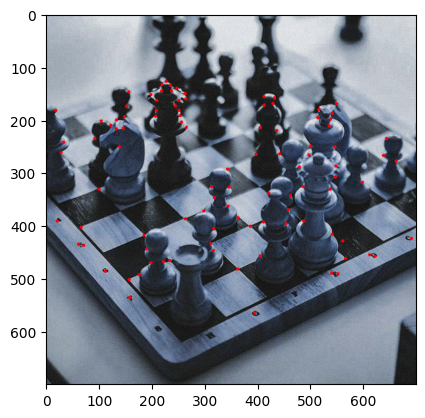

In [9]:

import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
img = cv2.imread('chess.jpg') 

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
corners = cv2.goodFeaturesToTrack(gray_img, 100, 0.01, 10) 
corners = corners.astype(np.int64)  # or np.int_

for i in corners: 
	x, y = i.ravel() 
	cv2.circle(img, (x, y), 3, (255, 0, 0), -1) 
plt.imshow(img) 
if cv2.waitKey(0) & 0xff == 27: 
	cv2.destroyAllWindows() 


In [4]:

import cv2 
import numpy as np 

image = cv2.imread('car3.jpg') 

# convert the input image into 
# grayscale color space 
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# modify the data type 
# setting to 32-bit floating point 
operatedImage = np.float32(operatedImage) 
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07) 

# Results are marked through the dilated corners 
dest = cv2.dilate(dest, None) 
image[dest > 0.01 * dest.max()]=[0, 0, 255] 

# the window showing output image with corners 
cv2.imshow('Image with Borders', image) 

# De-allocate any associated memory usage 
if cv2.waitKey(0) & 0xff == 27: 
	cv2.destroyAllWindows() 


In [7]:
import cv2 
import numpy as np 

# Load image 
image = cv2.imread('circles.jpg', 0) 

# Set our filtering parameters 
# Initialize parameter setting using cv2.SimpleBlobDetector 
params = cv2.SimpleBlobDetector_Params() 

# Set Area filtering parameters 
params.filterByArea = True
params.minArea = 100

# Set Circularity filtering parameters 
params.filterByCircularity = True
params.minCircularity = 0.9

# Set Convexity filtering parameters 
params.filterByConvexity = True
params.minConvexity = 0.2
	
# Set inertia filtering parameters 
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters 
detector = cv2.SimpleBlobDetector_create(params) 
	
# Detect blobs 
keypoints = detector.detect(image) 

# Draw blobs on our image as red circles 
blank = np.zeros((1, 1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0, 0, 255), 
						cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 

number_of_blobs = len(keypoints) 
text = "Number of Circular Blobs: " + str(len(keypoints)) 
cv2.putText(blobs, text, (20, 550), 
			cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2) 

# Show blobs 
cv2.imshow("Filtering Circular Blobs Only", blobs) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 


In [6]:
# importing libraries 
import numpy as np 
import imutils 
import cv2 

field_threshold = { "prev_policy_no" : 0.7, 
					"address"	 : 0.6, 
				} 

# Function to Generate bounding 
# boxes around detected fields 
def getBoxed(img, img_gray, template, field_name = "policy_no"): 

	w, h = template.shape[::-1] 

	# Apply template matching 
	res = cv2.matchTemplate(img_gray, template, 
						cv2.TM_CCOEFF_NORMED) 

	hits = np.where(res >= field_threshold[field_name]) 

	# Draw a rectangle around the matched region. 
	for pt in zip(*hits[::-1]): 
		cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), 
									(0, 255, 255), 2) 

		y = pt[1] - 10 if pt[1] - 10 > 10 else pt[1] + h + 20

		cv2.putText(img, field_name, (pt[0], y), 
			cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 1) 

	return img 


# Driver Function 
if __name__ == '__main__': 

	# Read the original document image 
	img = cv2.imread('doc1.png') 
		
	# 3-d to 2-d conversion 
	img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
	
	# Field templates 
	template_add = cv2.imread('doc1.png', 0) 
	template_prev = cv2.imread('doc1.png', 0) 

	img = getBoxed(img.copy(), img_gray.copy(), 
					template_add, 'address') 

	img = getBoxed(img.copy(), img_gray.copy(), 
				template_prev, 'prev_policy_no') 

	cv2.imshow('Detected', img) 
